In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.image as mpimg
from skimage import data, color, io, filters, morphology,transform, exposure, feature
from scipy import ndimage
from skimage.io import imread, imshow
from sklearn import linear_model, datasets
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA

In [2]:
dataset = pd.read_csv('./Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Analysis

In [3]:
# Delete CustomerID
dataset=dataset.drop('CustomerID',axis=1)

,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


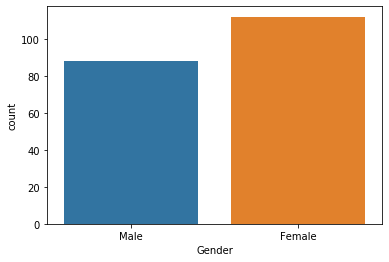

In [4]:
#Check man - woman count
sns.countplot(x='Gender',data=dataset)
#Little bit more woman than man

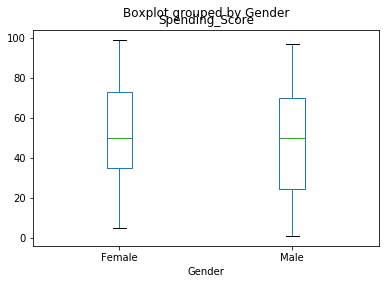

In [5]:
dataset.boxplot(by ='Gender', column =['Spending_Score'], grid = False) 
#Seems like woman spend a bit more money, but not huge amount

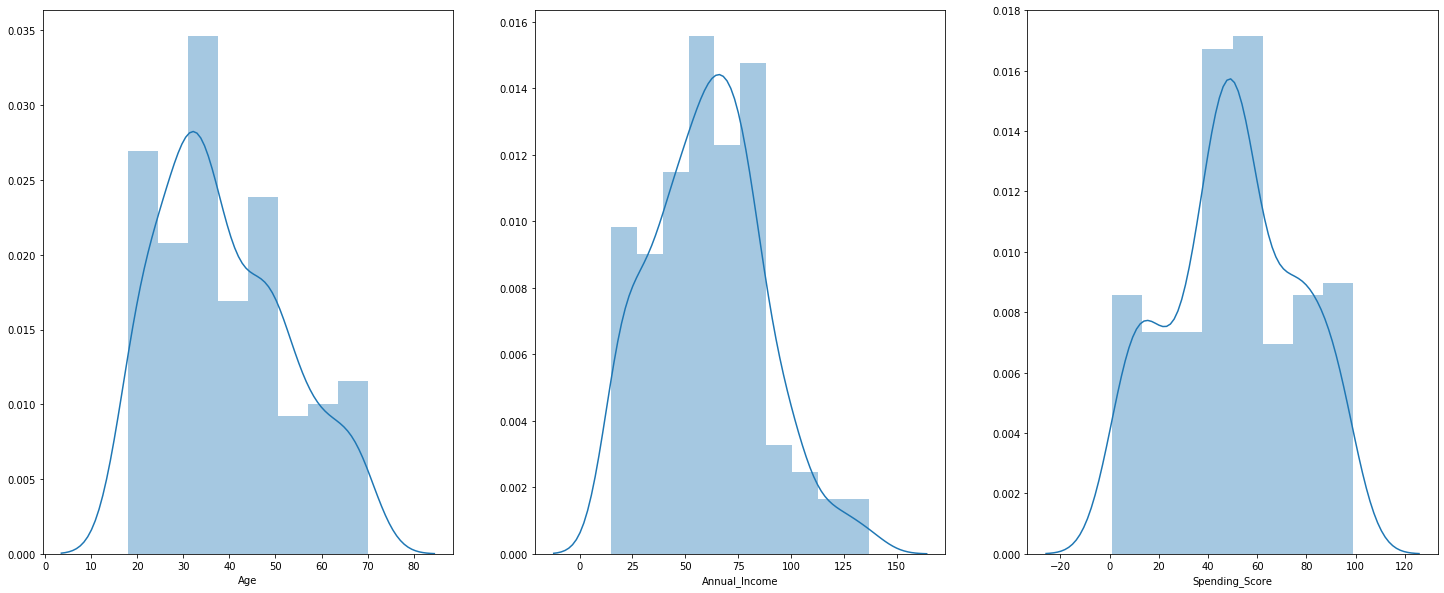

In [6]:
# Distribution of Age, Income and Spending_Score
fig, ax = plt.subplots(1,3)
fig.set_figwidth(25)
fig.set_figheight(10)
sns.distplot(dataset['Age'],ax=ax[0])
sns.distplot(dataset['Annual_Income'],ax=ax[1])
sns.distplot(dataset['Spending_Score'],ax=ax[2])

#Spending score has normal distribution
#Age and Anual income are more right skewed 

In [7]:
#Change female and male to 0 and 1
dataset=dataset.replace(to_replace=['Female', 'Male'], value=[0, 1])

# Clustering


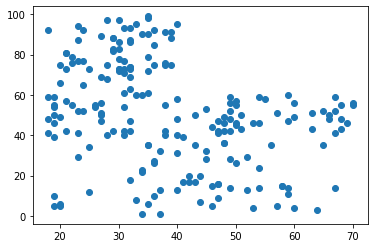

In [26]:
# Clustering Age en Spending_Score
plt.scatter(dataset['Age'], dataset['Spending_Score'])
plt.show()
#3 clusters
X=dataset[['Age','Spending_Score']]
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)


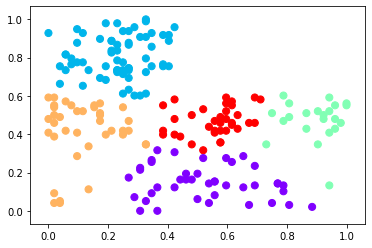

In [27]:
from sklearn.cluster import KMeans
est = KMeans(3)
est = KMeans(6)# Na elbow
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

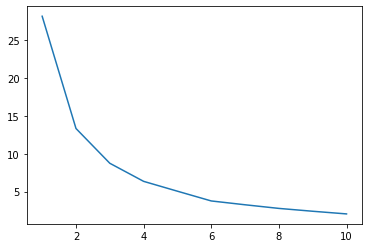

In [20]:
# Number of clusters bepalen
err = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(X)
    err.append(kmeans.inertia_)
    
plt.plot(range(1, 11), err)
plt.show()

#toch eerder voor 6 clusters gaan

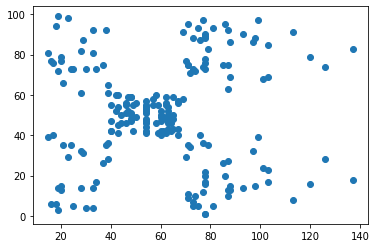

In [47]:
# Clustering Annual_Income en Spending_Score
plt.scatter(dataset['Annual_Income'], dataset['Spending_Score'])
plt.show()
#5 clusters
X=dataset[['Age','Spending_Score']]
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

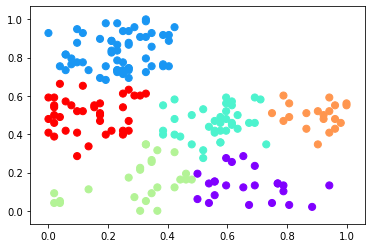

In [49]:
from sklearn.cluster import KMeans
est = KMeans(5)
est = KMeans(6)# Na elbow
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

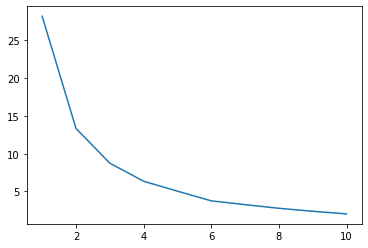

In [24]:
# Number of clusters bepalen
err = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(X)
    err.append(kmeans.inertia_)
    
plt.plot(range(1, 11), err)
plt.show()

Probeer nu de scatterplot tussen Gender en Spending_Score te clusteren. Je zal merken dat er affiniteit bestaat tussen de datapunten. Een methode die geschikt is voor het clusteren van deze geconnecteerde data is spectral clustering. Pas deze toe op Annual_Income en Spending_Score
Meer info over SpectralClustering is te vinden op https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

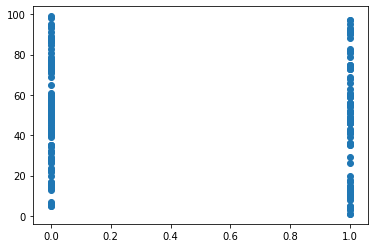

     Gender  Age  Annual_Income  Spending_Score
0         1   19             15              39
1         1   21             15              81
2         0   20             16               6
3         0   23             16              77
4         0   31             17              40
..      ...  ...            ...             ...
195       0   35            120              79
196       0   45            126              28
197       1   32            126              74
198       1   32            137              18
199       1   30            137              83

[200 rows x 4 columns]


In [58]:
# Clustering Gender en Spending_Score. Eerst via K-means daarna via Spectral Clustering
plt.scatter(dataset['Gender'], dataset['Spending_Score'])
plt.show()
print(dataset)
X=dataset[['Gender','Spending_Score']]
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

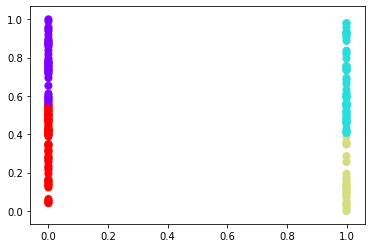

In [61]:
from sklearn.cluster import KMeans
est = SpectralClustering(n_clusters=4)#NA elbow
y_sc = est.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_sc, s=50, cmap='rainbow');

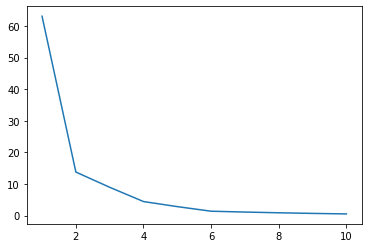

In [60]:
# Number of clusters bepalen
err = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(X)
    err.append(kmeans.inertia_)
    
plt.plot(range(1, 11), err)
plt.show()

Zoek de clusters via K-means op basis van Age, Annual_Income en Spending_Score. Gebruik ook hier de elleboog methode om het aantal clusters te bepalen.

Zet na clustering de data opniew terug naar de oorspronkelijk schaal. De meeste scalers beschikken over een inverse_transform methode die je kan gebruiken om terug te schalen.

Plot de scatterplot en de clusters in 3D. Je bent vrij in de keuze van de library die je hiervoor gebruikt. 

In hoeveel clusters heb je de data ingedeeld? Kan je ze beschrijven? Welke zijn interessant voor de supermarkt om op te focussen willen ze hun winst verhogen?


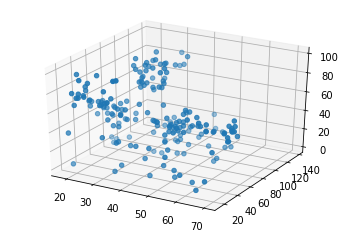

In [96]:
# Clustering van Age, Annual_Income en Spending_Score + 3D visualisatie en uiteindelijke interpretatie
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(dataset['Age'],dataset['Annual_Income'],dataset['Spending_Score'])
plt.show()
X=dataset[['Age','Annual_Income','Spending_Score']]
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

#PLOT IS VOOR SCALING
#hebben een cluster jongere mensen met hoge income die veel uitgeven
#hebben een cluster jongere mensen met lage income die veel uitgeven
#hebben een cluster middel age mensen met hoge income die weinig uitgeven

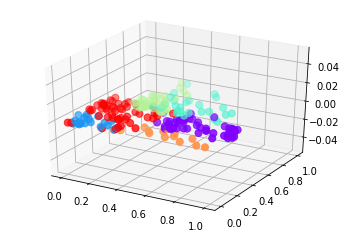

In [97]:
from sklearn.cluster import KMeans
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
est = SpectralClustering(n_clusters=6)# Na elbow
y_sc = est.fit_predict(X)
ax.scatter(X[:, 0], X[:, 1], c=y_sc, s=50, cmap='rainbow');

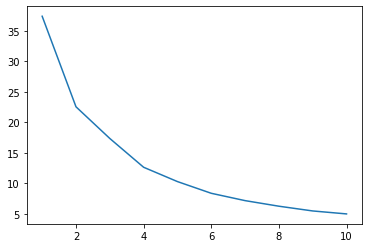

In [90]:
# Number of clusters bepalen
err = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(X)
    err.append(kmeans.inertia_)
    
plt.plot(range(1, 11), err)
plt.show()

##  Face recognition

Het doel van deze opdracht bestaat erin om een zo performant mogelijke gezichtsherkenning uit te voeren aan de hand van Eigenfaces. Deze techniek van Eigenfaces was een van de eerste succesvolle pogingen om via computer vision gezichten te classificeren. Tegenwoordig is deze methode achterhaald en mijlenver voorbij gestoken door technieken gebaseerd op Convolutional Neural Networks (zie module deep learning).
Bij deze opdracht worden een training- en test set van gezichten meegeleverd. De gezichten zijn afkomstig uit de Georgia Tech face database (http://www.anefian.com/research/face_reco.htm) en bevatten gezichten van 50 verschillende personen. Van elke persoon werden 15 foto's genomen.
De foto's die ter beschikken worden gesteld ondergingen al enige vorm van preprocessing zoals face cropping en face rotation.
Uit de bestandsnaam van elke foto kan het persoons ID worden gehaald. Voorbeeld: person22\_15\.jpg. Hier gaat het om de 15de foto van persoon 22.

Deze opdracht is in heel sterke mate gelijklopend met de demo MNIST_PCA.

De stappen om tot een succesvolle realisatie te komen zijn als volgt:
- Inlezen van de afbeeldingen. Haal het label van het gezicht uit de bestandsnaam.
- Converteer de afbeeldingen naar grijswaarden. Dit wordt reeds gedaan in de beschikbare code tijdens het inlezen van de afbeeldingen. 
- Schaal alle afbeeldingen naar dezelfde afmeting. Bijvoorbeeld 150x110 (150 rijen, 110 kolommen). Dit kan via skimage.transform.resize().
- Transformeer de training en test set zodanig dat een individuele afbeelding bestaat uit 1 rij. Met andere woorden maak van een 2D afbeelding een 1D vector door alle rijen van de afbeelding achter elkaar te plakken. Dit kan via np.reshape().
- Doe Principle Component Analyse. In de praktijk gebruikt men doorgaans een 40-tal Eigenfaces. Dit is ook het aantal wat je in eerste instantie mag gebruiken. Later wordt gevraagd dit aantal te variëren.
- Train een classifier (logistic regression, SVM, Random Forest Classifier) op de principle components.
- Test de classifier en evalueer de performantie (accuracy, recall, precision). Argumenteer waarom je voor een bepaalde classifier zou kiezen. 
- Doe hyperparameter tuning en probeer verschillende aantallen Eigenfaces.


Als uitbreiding wordt gevraagd om een face detector te bouwen. In tegenstelling tot gezichtsherkenning is het niet de bedoeling het gezicht in de afbeelding te classificeren maar om de locatie van het gezicht in de afbeelding via een bounding box te kunnen aanduiden.



### Bepalen van de principle components

In [2]:
# Inlezen van de training images
training_images = [] # empty list
test_images = [] # empty list
y_train = [] # empty list
y_test = [] # empty list

path = "./Faces/Training_images/"
valid_images = [".jpg",".gif",".png"]

for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    training_images.append(imread(os.path.join(path,f),as_gray=True))
    y_train.append(int(f[6:8]))

# Inlezen van de test images
path = "./Faces/Test_images/"
valid_images = [".jpg",".gif",".png"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    test_images.append(imread(os.path.join(path,f),as_gray=True))
    y_test.append(int(f[6:8]))
    
print("aantal training images: ", len(y_train))
print("aantal test images: ", len(y_test))

print("aantal unieke personen in de training set: ", len(set(y_train)))
print("aantal unieke personen in de test set: ", len(set(y_test)))

aantal training images:  500
aantal test images:  250
aantal unieke personen in de training set:  50
aantal unieke personen in de test set:  50


label van het cijfer:  39


(-0.5, 109.5, 149.5, -0.5)

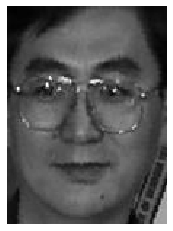

In [24]:
# Tonen van een afbeelding ter controle via plt.imshow(image,cmap='gray')
image_index = 14
print('label van het cijfer: ',y_train[image_index])
plt.imshow(training_images[image_index],cmap = 'gray')
plt.axis('off')


In [4]:
training_images

[array([[0.13906941, 0.13514784, 0.12730471, ..., 0.19982745, 0.18806275,
         0.18414118],
        [0.13906941, 0.13514784, 0.12730471, ..., 0.20374902, 0.19198431,
         0.18806275],
        [0.13514784, 0.13122627, 0.12730471, ..., 0.20319843, 0.19535529,
         0.19143373],
        ...,
        [0.15707804, 0.15118431, 0.16238353, ..., 0.53167373, 0.82579137,
         0.66557255],
        [0.16410275, 0.15989843, 0.16660275, ..., 0.68125882, 0.78321961,
         0.87341569],
        [0.17952118, 0.18287725, 0.17586745, ..., 0.54400392, 0.76753333,
         0.72439608]]),
 array([[0.26023373, 0.26807686, 0.26921569, ..., 0.16515137, 0.20268549,
         0.23013647],
        [0.26023373, 0.26807686, 0.26529412, ..., 0.15730824, 0.19260235,
         0.2262149 ],
        [0.25631216, 0.26137255, 0.25942314, ..., 0.14554353, 0.18083765,
         0.2122102 ],
        ...,
        [0.13903922, 0.15472549, 0.14798353, ..., 0.22790275, 0.31976549,
         0.41750706],
        [0.1

In [3]:
# Afbeelding herschalen naar afbeeldingen van 150 rijen en 110 kolommen
# Skimage transform bevat de methode transform
# transform.resize(image,(rows,cols),mode='constant')

training_images=[transform.resize(training_images[image_nr],(150,110),mode='constant') for image_nr in range(len(training_images))] 
test_images=[transform.resize(test_images[image_nr],(150,110),mode='constant') for image_nr in range(len(test_images))]

# for i in range(len(training_images)):
#     training_images[i]=transform.resize(training_images[i],(150,100))
    
# for i in range(len(test_images)):
#     test_images[i]=transform.resize(test_images[i],(150,100))

In [4]:
training_images[0].shape

(150, 110)

In [5]:
# Omzetten naar training en test set. Afbeeldingen naar 1 dimensie brengen (1 rij pixels per afbeelding)
X_train = []
X_test = []
# for i in range(len(training_images)):
#     X_train.append(training_images[i].reshape(-1,1))
    
# for i in range(len(test_images)):
#     X_test.append(test_images[i].reshape(-1,1))
    
X_train = [image.flatten() for image in training_images]
X_test = [image.flatten() for image in test_images]  


In [6]:
X_train[0].shape

(16500,)

In [7]:
# Dimensionality reduction: Principle Component Analysis met 40 componenten
number_of_components = 40

pca_model = PCA(n_components=number_of_components, svd_solver='full')
pca_model.fit(X_train)

#Reduceer het aantal dimensies van zowel de trainig set als de test set
X_train_pca = pca_model.transform(X_train)
X_test_pca = pca_model.transform(X_test)

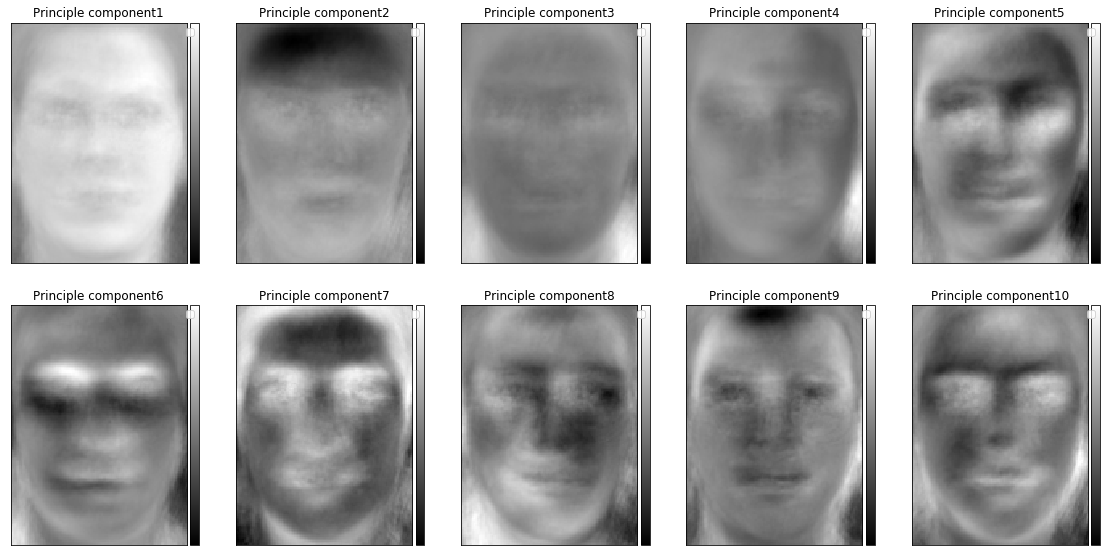

In [10]:
# Visualiseer de eerste 10 principle components (de 10 eerste Eigenfaces)
PCA_components = pca_model.components_

fig = plt.figure(figsize=(16, 9)) 
for i in range(0,10):
    ax = fig.add_subplot(2, 5, i+1)
    imshow(PCA_components[i].reshape((150,110)),cmap='gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    plt.axis('off')
    plt.legend('off')
    
    ax.set_title('Principle component'+str(i+1))
    # x and y axis should be equal length
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
plt.show()

#Basis patronen

In [11]:
# Geef de PCA scores van een bepaald gezicht
# Wat is de betekenis van deze scores?
print(X_train_pca[image_index,:])

#Hoeveel gewicht we aan elke pca moeten hangen om onze afbeelding te reconstrueren 
#op basis van die 40 components


[-10.71278277  -0.4656687   -2.04254408  -1.63370983  -0.01733261
  -0.11846941  -1.07922646  -0.92768688   0.32885746   1.90668741
  -4.10036847  -0.37352088   0.56071492  -2.48360456  -0.26017599
  -0.51070545   0.34301854   0.80709527   0.08508148   0.17955725
   1.10883246   0.50023601   1.61109097   0.61984009   1.21511526
   0.91500319   0.42123729   0.33654042  -0.44956869   0.07829997
  -0.6698067    1.0361806    0.69400582  -0.78840541  -0.44941112
   1.34647512  -0.04535784   0.26052374   0.23284263  -0.6239026 ]


In [12]:
# Geef weer hoeveel procent van de variantie in totaal wordt verklaard door alle principle components
print(np.sum(pca_model.explained_variance_ratio_))


0.8068217477820613


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
[0.31299019 0.3947984  0.45001934 0.49551253 0.53088251 0.56001625
 0.585277   0.60752005 0.62352158 0.63906729 0.65257835 0.66478699
 0.67516751 0.68517082 0.69396302 0.70178219 0.70902571 0.71574948
 0.72172626 0.72745666 0.73304567 0.73846828 0.74359429 0.7485391
 0.75336793 0.75799737 0.76252784 0.76684348 0.77107789 0.7749051
 0.77869207 0.78238172 0.78587312 0.789223   0.792383   0.79545501
 0.79844999 0.80135248 0.80413568 0.80682175]


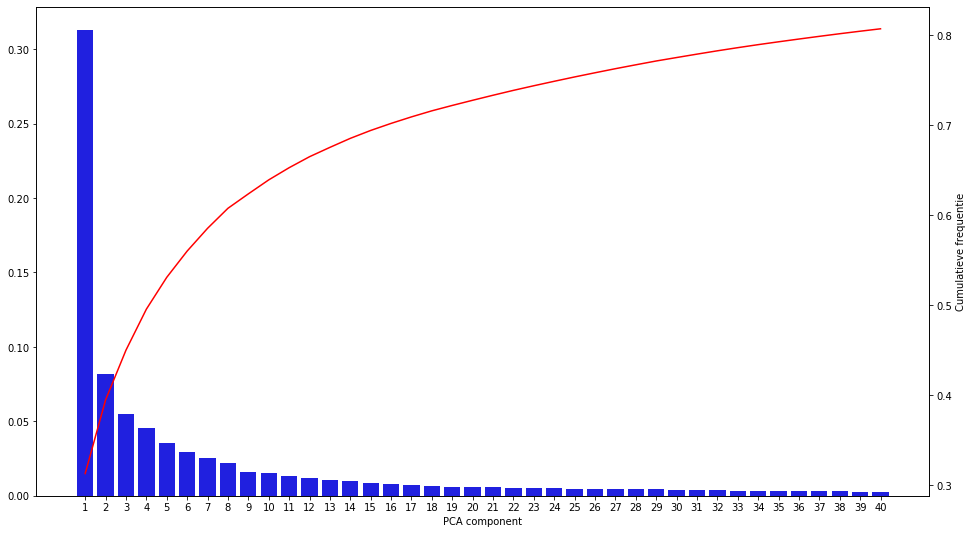

In [13]:
# Genereer een gecombineerde grafiek van de verklaarde variantie in functie van de principle component. 
# Staafdiagram van de verklaarde variantie van de individuele principle componenten en anderzijds de cumulatieve
# verklaarde variantie
PCAnumber = np.arange(1,number_of_components+1)
print(PCAnumber)
PCA_explained_cumulative = np.cumsum(pca_model.explained_variance_ratio_)
print(PCA_explained_cumulative)

fig = plt.figure(figsize=(16, 9)) 
ax = sns.barplot(PCAnumber,pca_model.explained_variance_ratio_,color='blue')
plt.xlabel('PCA component')
ax2=ax.twinx() # dubbele y-as
ax.yaxis.set_label_position('left')
ax2.yaxis.set_label_position('right')
ax2.set_ylabel('Cumulatieve frequentie')
plt.plot(PCA_explained_cumulative, c='red')

#Geeft belang weer van elke Principal component, hoeveel variantie valt elke component op

(16500,)


(-0.5, 109.5, 149.5, -0.5)

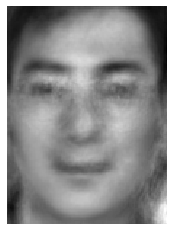

In [14]:
# Reconstrueer een gezicht aan de hand van de Eigenfaces
image_reconstructed = pca_model.inverse_transform(X_train_pca[image_index,:])
print(image_reconstructed.shape)

plt.imshow(image_reconstructed.reshape((150, 110)),cmap = 'gray')
plt.axis('off')

### Classificatie

Train meerdere classifiers (logistic regression, SVM, Random Forest Trees, Ensembles) voor het herkennen van de gezichten. Gebruik als features de gewichtsfactoren bekomen via de PCA analyse. Doe cross-validation voor het vinden van de optimale hyperparameters.

- Varieer eens het aantal gebruikte Eigenfaces. Wat gebeurt er met de accuracy van de classifiers wanneer je het aantal vermindert (minder dan 40) en wat als je ze vermeerdert.

- Heeft het aantal gebruikte Eigenfaces een sterke invloed op de rekentijd?

- Beschrijf duidelijk welke methode je verkiest.

- Visualiseer een aantal verkeerd geclassificeerde gezichten. 



In [8]:
# Scaling van de eigenfaces
scaler = preprocessing.StandardScaler().fit(X_train_pca)
X_train_pca = scaler.transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)


In [9]:
# Classificatie
model = LogisticRegression(class_weight="balanced")
parameters = {'solver': ['liblinear','newton-cg','lbfgs'],
              'C': uniform(0.001, 1)} # haal C uit een random uniform distribution


n_iter_search = 100


random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=10,n_iter=n_iter_search,n_jobs = 7,verbose=10)

random_search = random_search.fit(X_train_pca, y_train)

best_accuracy = random_search.best_score_ 
best_parameters = random_search.best_params_  

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test_pca)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

#opvallend dat model niet consistent is in performance. over algemeen 82% is OK

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best accuracy :  0.8800000000000001
Best parameters : {'C': 0.4332703709163874, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.75      0.60      0.67         5
           3       1.00      0.60      0.75         5
           4       0.44      0.80      0.57         5
           5       1.00      0.80      0.89         5
           6       0.60      0.60      0.60         5
           7       0.71      1.00      0.83         5
           8       1.00      0.80      0.89         5
           9       0.67      0.40      0.50         5
          10       1.00      1.00      1.00         5
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       0.67      0.80      0.73         5
          14       0.57      0.80      0.67         5
          15       1.00  

In [17]:
from sklearn.svm import SVC
fouten=[]
model = SVC(probability=True,class_weight="balanced")
parameters = {'kernel': ['linear','rbf','poly'],
              'C': uniform(1, 100), # haal C uit een random uniform distribution
              'gamma': uniform(1, 100)}


n_iter_search = 100


random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=10,n_iter=n_iter_search,n_jobs = 7,verbose=1)

random_search = random_search.fit(X_train_pca, y_train)

best_accuracy = random_search.best_score_ 
best_parameters = random_search.best_params_  

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test_pca)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

#Doet over algemeen licht beter dan logistic, maar ook hier zien we dat sommige faces zeer slecht te herkennen zijn

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best accuracy :  0.89
Best parameters : {'C': 64.5567936035398, 'gamma': 73.90952066487468, 'kernel': 'linear'}
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       1.00      0.80      0.89         5
           3       0.80      0.80      0.80         5
           4       0.36      0.80      0.50         5
           5       1.00      0.80      0.89         5
           6       0.50      0.60      0.55         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       0.80      0.80      0.80         5
          10       1.00      1.00      1.00         5
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       0.67      0.80      0.73         5
          14       0.57      0.80      0.67         5
          15

In [18]:
from sklearn.model_selection import GridSearchCV
model=RandomForestClassifier()
parameters = {
    'bootstrap': [True],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [500]
}

grid_search = GridSearchCV(estimator = model, param_grid = parameters, cv = 10, n_jobs = 7,
verbose=5)

grid_search = grid_search.fit(X_train_pca, y_train)

best_parameters = grid_search.best_params_  
print('Best parameters :',grid_search.best_params_  )
print(grid_search.score(X_test_pca,y_test))

#Doet minder goed dan logistic regression

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best parameters : {'bootstrap': True, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 500}
0.764


In [18]:
# verkeerd geklassificeerde gezichten:



Kijk of je met ensemble methodes zoals boosting de accuracy nog kan verhogen.

In [15]:
from sklearn.svm import SVC
# Ensemble methodes
# Boosting
# Adaboost
cart = SVC(probability=True,class_weight="balanced",C= 64.5567936035398,gamma= 73.90952066487468,kernel= 'linear')
logreg_adaboost = AdaBoostClassifier(base_estimator=cart,n_estimators=500) 
logreg_adaboost.fit(X_train_pca,y_train)

y_pred = logreg_adaboost.predict(X_test_pca)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

#Gelijkaardig aan normale svc

              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.60      0.60      0.60         5
           3       1.00      0.80      0.89         5
           4       0.50      0.80      0.62         5
           5       1.00      0.80      0.89         5
           6       1.00      0.60      0.75         5
           7       1.00      1.00      1.00         5
           8       1.00      0.80      0.89         5
           9       0.50      0.60      0.55         5
          10       1.00      0.80      0.89         5
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       0.80      0.80      0.80         5
          14       0.56      1.00      0.71         5
          15       1.00      0.80      0.89         5
          16       0.75      0.60      0.67         5
          17       0.75      0.60      0.67         5
          18       0.50    

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gradientboost = GradientBoostingClassifier(n_estimators=500)

clf_gradientboost.fit(X_train_pca,y_train)


y_pred = clf_gradientboost.predict(X_test_pca)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

#Doet heel pak slechter dan andere modellen

              precision    recall  f1-score   support

           1       0.67      0.40      0.50         5
           2       1.00      0.20      0.33         5
           3       1.00      0.60      0.75         5
           4       0.18      0.80      0.30         5
           5       0.29      0.40      0.33         5
           6       0.67      0.40      0.50         5
           7       0.20      0.20      0.20         5
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5
          10       0.50      0.40      0.44         5
          11       0.67      0.40      0.50         5
          12       1.00      0.80      0.89         5
          13       0.25      0.20      0.22         5
          14       0.43      0.60      0.50         5
          15       1.00      0.60      0.75         5
          16       0.17      0.40      0.24         5
          17       0.14      0.40      0.21         5
          18       0.29    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [22]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB# Stacking
estimators = [
    ('svc', SVC(probability=True,class_weight="balanced",C= 64.5567936035398,gamma= 73.90952066487468,kernel= 'linear')),
    ('nb' , GaussianNB()),
    ('rfc', RandomForestClassifier(n_estimators = 500,class_weight="balanced"))
]
    
lr = LogisticRegression()  
    
stacked_model = StackingClassifier(
estimators=estimators, final_estimator=lr,cv=10,n_jobs=7)    
    
stacked_model.fit(X_train_pca,y_train)


y_pred = stacked_model.predict(X_test_pca)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.75      0.60      0.67         5
           3       1.00      0.60      0.75         5
           4       0.43      0.60      0.50         5
           5       0.67      0.80      0.73         5
           6       0.75      0.60      0.67         5
           7       1.00      1.00      1.00         5
           8       1.00      0.80      0.89         5
           9       0.60      0.60      0.60         5
          10       1.00      1.00      1.00         5
          11       0.75      0.60      0.67         5
          12       1.00      1.00      1.00         5
          13       0.75      0.60      0.67         5
          14       0.36      0.80      0.50         5
          15       1.00      0.60      0.75         5
          16       0.38      0.60      0.46         5
          17       1.00      0.40      0.57         5
          18       0.33    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [ ]:
#Conclusie
#Eeen SVM eventueel met boosting werkt hier het beste, Maar het hangt wel zwaar af van face,
#Model heeft moeilijker met brillen

###  Uitbreiding - Face detection

De bedoeling van face detection is het kunnen lokaliseren van gezichten in een afbeelding. Tegenwoordig bestaan hiervoor bestaan speciale getrainde neurale netwerken die hier bijzonder goed in zijn die later in deep learning aan bod zullen komen.
Wat deze opdracht gaan we een minder geavanceerde werkwijze hanteren:

- Maak een training set die bestaat uit foto's van gezichten enerzijds maar ook uit foto's van niet gezichten anderzijds.Online zijn verschillende gezichtsdatasets te vinden. Bijvoorbeeld: https://lionbridge.ai/datasets/5-million-faces-top-15-free-image-datasets-for-facial-recognition/ en http://shuoyang1213.me/WIDERFACE/. Dataset met afbeeldingen van niet-gezichten zijn vrij makkelijk te vinden. Je kan ook enkel hoge resolutie afbeeldingen verzamelen waarop geen gezichten staan. Hieruit kan je heel wat subafbeeldingen knippen die je gebruikt voor de negatieve klasse.
- Train een classifier (naar eigen keuze) die met een zo hoog mogelijke accuraatheid gezichten van niet-gezichten kan onderscheiden.
- Test deze classifier om een idee te hebben van de classifiation accuracy. 
- Indien de performantie voldoende hoog is kan je een sliding window detector implementeren. Dit betekent dat je de test-afbeelding meerdere keren afscant met een sliding window van verschillende groottes. De classifier zal voor elke positie van het sliding window een classificatie doen van de subimage die onder het window is gelegen. Teken een bounding box wanneer de subimage een gezicht bevat.

Voor het tekenen van een bounding box kan de volgende code gebruikt worden:

```python
def rectangle_perimeter(r0, c0, width, height, shape=None, clip=False):
    rr, cc = [r0, r0 + width, r0 + width, r0], [c0, c0, c0 + height, c0 + height]
    return skimage.draw.polygon_perimeter(rr, cc, shape=shape, clip=clip)

# drawing the bounding box:
rr, cc = rectangle_perimeter(y, x, w, w)
image_detected[rr,cc] =255

```

Test de face detector op een afbeelding waarop 1 of meerdere personen staan afgebeeld en kijk of de gezichten worden gedetecteerd. 

Een voorbeeld:

![alt text](./Jupyter_Images/Face_Detection.png) 


Extra uitbreiding:

Probleem: omdat we de afbeelding meerdere keren afscannen, telkens met windows van verschillende grootte is het goed mogelijk dat er meerdere bounding boxes worden geteked rond hetzelfde gezicht. Zoek naar een manier om meerdere bounding boxes die bij hetzelfde gezicht horen samen te voegen tot 1 bounding box.
Een veel gebruikte techniek is Non-Maximum Suppression: https://www.pyimagesearch.com/2014/11/17/non-maximum-suppression-object-detection-python/ en https://www.pyimagesearch.com/2015/02/16/faster-non-maximum-suppression-python/.


In [20]:
# Uitwerking face detection
